#타이타닉 예제

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
raw_data = pd.read_excel('titanic.xls')
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [3]:
#survived라는 결과에 영향을 미치는 의미있는 칼럼들만 추려내기
#pclass, sex, age, sibsp, parch,fare

In [4]:
raw_data.info()
#구성이랑 결측치가있는지없는지확인
#총개수와 칼럼개수확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [5]:
raw_data.describe()
#숫자로 이루어진 데이터들만 알아서 추려짐

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


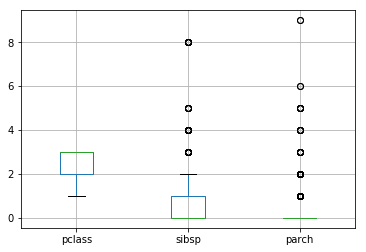

In [6]:
raw_data[['pclass','sibsp','parch']].boxplot()

0    809
1    500
Name: survived, dtype: int64


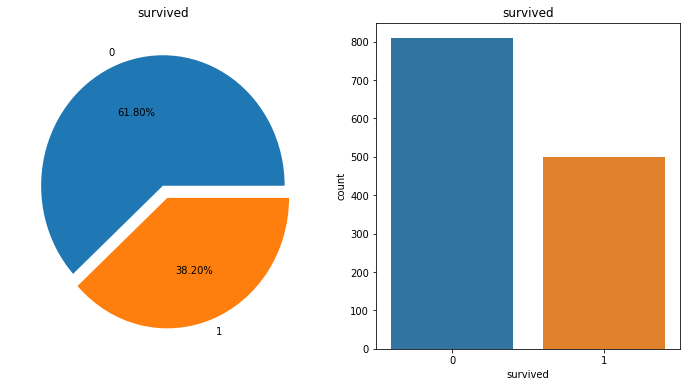

In [7]:
#생존률 그래프
f,ax = plt.subplots(1, 2, figsize=(12,6))

print(raw_data['survived'].value_counts())
#0=사망자, 1=생존자

#그래프로 그려주기(pie형태로)
#ax=ax[0]왼쪽꺼 첫번째꺼에 그린다는 뜻
#autopct="%1.2f%%" 자동으로 퍼센트 계산
#explode=[0,0.1] 파이차트에서 두 가지 파이 사이의 간격을 띄워주는 것
raw_data['survived'].value_counts().plot.pie(explode=[0,0.1], autopct="%1.2f%%", ax=ax[0])

#제목 만들어주기, y축 라벨은 공란으로 만들기
ax[0].set_title('survived')
ax[0].set_ylabel('')

#데이터의 숫자 세기 -> 오른쪽에 그래프 그리기
sns.countplot('survived',data=raw_data, ax=ax[1])
ax[1].set_title('survived')

plt.show()

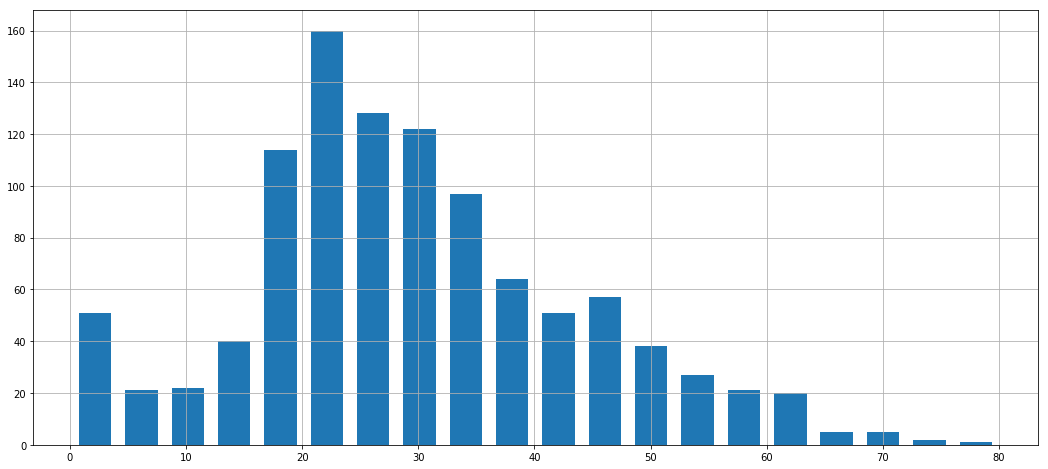

In [8]:
#연령대 

#연령대의 빈도수를 히스토그램으로 알아보기, bins 몇조각으로 쪼개느냐
#막대차트의 길이 rwith를 조절해서 간격을 띄우기 가능
raw_data['age'].hist(bins=20, figsize=(18,8), grid=True, rwidth=0.7)

plt.show()

In [9]:
#객실 등급별 통계

raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


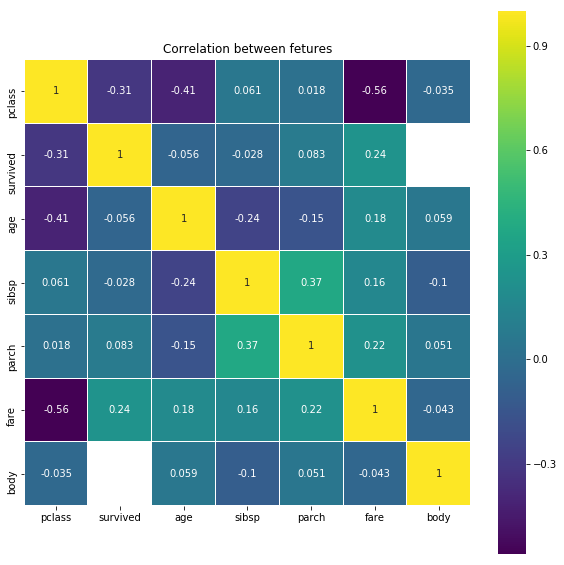

In [10]:
#상관계수 그래프

plt.figure(figsize=(10,10))
raw_data.corr()

sns.heatmap(raw_data.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor='white')
plt.title('Correlation between fetures')

plt.show()

In [11]:
#나이에 따라서 상관관계가 있는지

#'age_cat'이라는 칼럼 추가하기
#pd.cut 데이터를 ()와 같은 기준으로 끊어서 만든다
raw_data['age_cat']=pd.cut(raw_data['age'], bins=[0,10,20,50,100], include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",adult
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",old
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",old


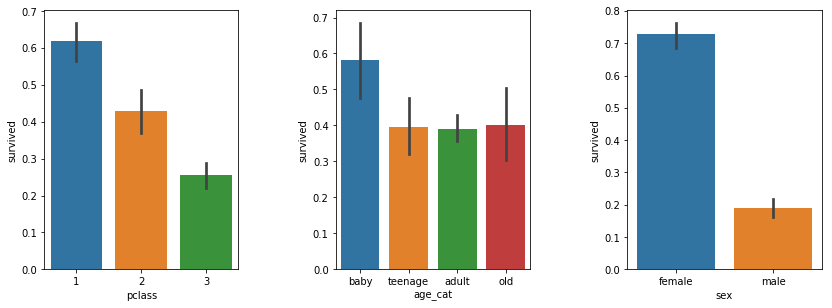

In [12]:
#사이즈 설정
plt.figure(figsize=(12,4))

#첫번째 숫자=row개수, 두번째숫자=column개수, 세번째숫자=순서
#row방향으로 하나, column방향으로 세개, 첫번째 자리
plt.subplot(131)

#탑승석 / sns.barplot('x축', 'y축')
sns.barplot('pclass', 'survived', data=raw_data)

#연령별 / 두번째 자리
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)

#성별 / 세번째 자리
plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)

#보기 좋게 만들어보기(간격조정) (옵션)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)

plt.show()

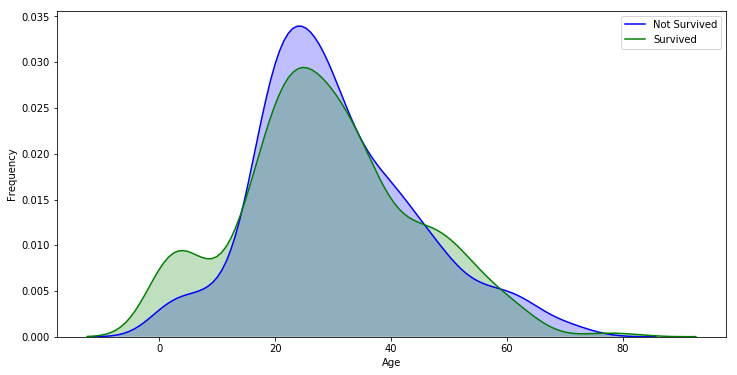

In [13]:
#나이곡선 그래프
#사이즈 설정
f,ax = plt.subplots(figsize=(12,6))

g = sns.kdeplot(raw_data['age'][(raw_data['survived']==0) & (raw_data['age'].notnull())], ax=ax, color='Blue', shade = True)
#ax=g 기존에 그렸던 g에 중첩해서 그리겠다는 의미
g = sns.kdeplot(raw_data['age'][(raw_data['survived']==1) & (raw_data['age'].notnull())], ax=g, color='Green', shade = True)

#제목붙이기
g.set_xlabel('Age')
g.set_ylabel('Frequency')
#범례 넣기
g = g.legend(['Not Survived', 'Survived'])

plt.show()

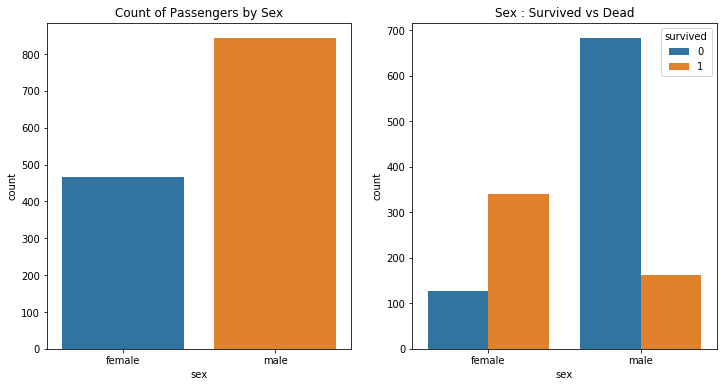

In [14]:
#성별 비교 그래프
f,ax = plt.subplots(1,2, figsize=(12,6))

#전체 승객에서의 성별 차이
sns.countplot('sex', data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

#각 성별에서 생존자, 사망자 비율
sns.countplot('sex', hue='survived', data=raw_data, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')

plt.show()

1    477
0      9
Name: survived, dtype: int64


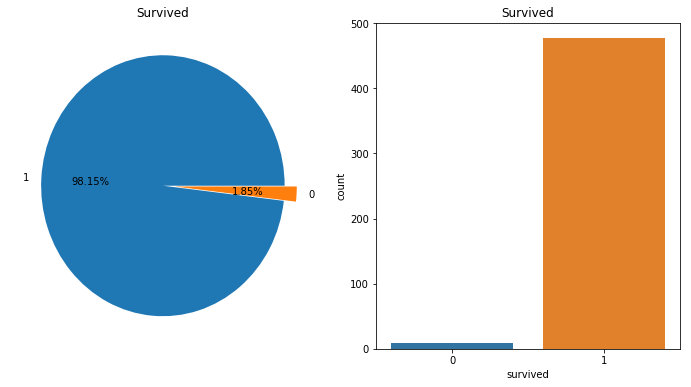

In [15]:
#boat 탑승여부에 따라서

boat_survivors = raw_data[raw_data['boat'].notnull()]
f, ax = plt.subplots(1,2, figsize=(12,6))

print(boat_survivors['survived'].value_counts())

boat_survivors['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=boat_survivors, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

In [16]:
# #데이터 정제
tmp=[]
for i in raw_data['sex']:
    if i =='female':
        tmp.append(1)
    elif i =='male':
        tmp.append(0)
    else:
        tmp.append(np.nan)
        
raw_data['sex'] = tmp

In [17]:
raw_data['sex']

0       1
1       0
2       1
3       0
4       1
5       0
6       1
7       0
8       1
9       0
10      0
11      1
12      1
13      1
14      0
15      0
16      0
17      1
18      1
19      0
20      0
21      1
22      0
23      1
24      1
25      0
26      0
27      1
28      1
29      0
       ..
1279    1
1280    0
1281    0
1282    0
1283    0
1284    0
1285    0
1286    1
1287    0
1288    0
1289    0
1290    1
1291    0
1292    0
1293    0
1294    0
1295    0
1296    0
1297    0
1298    0
1299    0
1300    1
1301    0
1302    0
1303    0
1304    1
1305    1
1306    0
1307    0
1308    0
Name: sex, Length: 1309, dtype: int64

In [18]:
raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

In [19]:
#데이터값이 있는 아이들만 사용하겠다

In [20]:
raw_data = raw_data[raw_data['age'].notnull()]

In [21]:
raw_data = raw_data[raw_data['sibsp'].notnull()]

In [22]:
raw_data = raw_data[raw_data['parch'].notnull()]

In [23]:
raw_data = raw_data[raw_data['fare'].notnull()]

In [24]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
pclass       1045 non-null float64
survived     1045 non-null float64
name         1045 non-null object
sex          1045 non-null float64
age          1045 non-null float64
sibsp        1045 non-null float64
parch        1045 non-null float64
ticket       1045 non-null object
fare         1045 non-null float64
cabin        272 non-null object
embarked     1043 non-null object
boat         417 non-null object
body         119 non-null float64
home.dest    685 non-null object
age_cat      1045 non-null category
dtypes: category(1), float64(8), object(6)
memory usage: 123.7+ KB


In [25]:
#데이터 선별

In [26]:
#행은 전부, 열은 골라서(pclass, survived, sex, age, sibsp, parch, fare)
x_data = raw_data.values[:, [0,3,4,5,6,8]]
x_data

array([[1.0, 1.0, 29.0, 0.0, 0.0, 211.3375],
       [1.0, 0.0, 0.9167, 1.0, 2.0, 151.55],
       [1.0, 1.0, 2.0, 1.0, 2.0, 151.55],
       ...,
       [3.0, 0.0, 26.5, 0.0, 0.0, 7.225],
       [3.0, 0.0, 27.0, 0.0, 0.0, 7.225],
       [3.0, 0.0, 29.0, 0.0, 0.0, 7.875]], dtype=object)

In [27]:
y_data = raw_data.values[:,[1]]
y_data

array([[1.0],
       [1.0],
       [0.0],
       ...,
       [0.0],
       [0.0],
       [0.0]], dtype=object)

In [28]:
#훈련데이터와 테스트데이터로 나누기(테스트데이터의 정답률이 중요)

from sklearn.model_selection import train_test_split

In [29]:
#관행적으로 데이터는 대문자로, 정답은 소문자로
#test_size 10%를 테스트데이터로 하겠다, 나머지는 훈련데이터
#random_state 는 numpy에서 seed값과 비슷한 개념
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=7)

In [30]:
X_train.shape, X_test.shape, y_train.size, y_test.size

((940, 6), (105, 6), 940, 105)

In [31]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [32]:
import keras

Using TensorFlow backend.


In [33]:
from keras.models import Sequential
from keras.layers.core import Dense
np.random.seed(7)

In [34]:
#버전확인
tf.__version__

'1.12.0'

In [35]:
#버전확인
keras.__version__

'2.2.4'

In [36]:
#모델만들기
model = Sequential()
model.add(Dense(256, input_shape=(6,), activation='relu'))
model.add(Dense( (1), activation='sigmoid') )
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


In [37]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

Train on 940 samples, validate on 105 samples
Epoch 1/500
940/940 [==============================] - 0s 313us/step - loss: 0.2665 - acc: 0.6128 - val_loss: 0.1997 - val_acc: 0.7524
Epoch 2/500
940/940 [==============================] - 0s 68us/step - loss: 0.2080 - acc: 0.6989 - val_loss: 0.1898 - val_acc: 0.7619
Epoch 3/500
940/940 [==============================] - 0s 51us/step - loss: 0.2009 - acc: 0.7149 - val_loss: 0.1988 - val_acc: 0.7524
Epoch 4/500
940/940 [==============================] - 0s 64us/step - loss: 0.1935 - acc: 0.7106 - val_loss: 0.1827 - val_acc: 0.7238
Epoch 5/500
940/940 [==============================] - 0s 66us/step - loss: 0.1797 - acc: 0.7468 - val_loss: 0.1720 - val_acc: 0.7905
Epoch 6/500
940/940 [==============================] - 0s 59us/step - loss: 0.1684 - acc: 0.7691 - val_loss: 0.1600 - val_acc: 0.8000
Epoch 7/500
940/940 [==============================] - 0s 65us/step - loss: 0.1696 - acc: 0.7532 - val_loss: 0.1634 - val_acc: 0.7905
Epoch 8/500
940

940/940 [==============================] - 0s 60us/step - loss: 0.1436 - acc: 0.8096 - val_loss: 0.1453 - val_acc: 0.8286
Epoch 62/500
940/940 [==============================] - 0s 56us/step - loss: 0.1468 - acc: 0.7894 - val_loss: 0.1533 - val_acc: 0.8000
Epoch 63/500
940/940 [==============================] - 0s 69us/step - loss: 0.1409 - acc: 0.8106 - val_loss: 0.1453 - val_acc: 0.8095
Epoch 64/500
940/940 [==============================] - 0s 77us/step - loss: 0.1432 - acc: 0.8074 - val_loss: 0.1514 - val_acc: 0.8000
Epoch 65/500
940/940 [==============================] - ETA: 0s - loss: 0.1423 - acc: 0.806 - 0s 76us/step - loss: 0.1437 - acc: 0.8021 - val_loss: 0.1444 - val_acc: 0.8095
Epoch 66/500
940/940 [==============================] - 0s 95us/step - loss: 0.1421 - acc: 0.8074 - val_loss: 0.1475 - val_acc: 0.8000
Epoch 67/500
940/940 [==============================] - 0s 76us/step - loss: 0.1409 - acc: 0.8138 - val_loss: 0.1522 - val_acc: 0.8381
Epoch 68/500
940/940 [========

Epoch 121/500
940/940 [==============================] - 0s 59us/step - loss: 0.1414 - acc: 0.8106 - val_loss: 0.1442 - val_acc: 0.8095
Epoch 122/500
940/940 [==============================] - 0s 59us/step - loss: 0.1321 - acc: 0.8213 - val_loss: 0.1439 - val_acc: 0.8381
Epoch 123/500
940/940 [==============================] - 0s 55us/step - loss: 0.1431 - acc: 0.8011 - val_loss: 0.1720 - val_acc: 0.7524
Epoch 124/500
940/940 [==============================] - 0s 79us/step - loss: 0.1528 - acc: 0.7989 - val_loss: 0.1457 - val_acc: 0.8286
Epoch 125/500
940/940 [==============================] - 0s 70us/step - loss: 0.1425 - acc: 0.8085 - val_loss: 0.1616 - val_acc: 0.7810
Epoch 126/500
940/940 [==============================] - 0s 81us/step - loss: 0.1395 - acc: 0.8074 - val_loss: 0.1486 - val_acc: 0.8095
Epoch 127/500
940/940 [==============================] - 0s 63us/step - loss: 0.1350 - acc: 0.8170 - val_loss: 0.1437 - val_acc: 0.8190
Epoch 128/500
940/940 [=========================

940/940 [==============================] - 0s 57us/step - loss: 0.1330 - acc: 0.8149 - val_loss: 0.1558 - val_acc: 0.7905
Epoch 182/500
940/940 [==============================] - 0s 76us/step - loss: 0.1386 - acc: 0.8064 - val_loss: 0.1444 - val_acc: 0.8000
Epoch 183/500
940/940 [==============================] - 0s 84us/step - loss: 0.1307 - acc: 0.8277 - val_loss: 0.1462 - val_acc: 0.8381
Epoch 184/500
940/940 [==============================] - 0s 101us/step - loss: 0.1349 - acc: 0.8181 - val_loss: 0.1460 - val_acc: 0.8286
Epoch 185/500
940/940 [==============================] - 0s 109us/step - loss: 0.1334 - acc: 0.8213 - val_loss: 0.1417 - val_acc: 0.8476
Epoch 186/500
940/940 [==============================] - 0s 67us/step - loss: 0.1352 - acc: 0.8181 - val_loss: 0.1460 - val_acc: 0.8476
Epoch 187/500
940/940 [==============================] - 0s 59us/step - loss: 0.1340 - acc: 0.8213 - val_loss: 0.1601 - val_acc: 0.7619
Epoch 188/500
940/940 [==============================] - 0s 

940/940 [==============================] - 0s 76us/step - loss: 0.1325 - acc: 0.8223 - val_loss: 0.1704 - val_acc: 0.8190
Epoch 242/500
940/940 [==============================] - 0s 57us/step - loss: 0.1367 - acc: 0.8128 - val_loss: 0.1604 - val_acc: 0.8190
Epoch 243/500
940/940 [==============================] - 0s 54us/step - loss: 0.1330 - acc: 0.8213 - val_loss: 0.1697 - val_acc: 0.7905
Epoch 244/500
940/940 [==============================] - 0s 54us/step - loss: 0.1295 - acc: 0.8309 - val_loss: 0.1551 - val_acc: 0.7810
Epoch 245/500
940/940 [==============================] - 0s 57us/step - loss: 0.1276 - acc: 0.8202 - val_loss: 0.1535 - val_acc: 0.8286
Epoch 246/500
940/940 [==============================] - 0s 51us/step - loss: 0.1359 - acc: 0.8160 - val_loss: 0.1474 - val_acc: 0.8000
Epoch 247/500
940/940 [==============================] - 0s 53us/step - loss: 0.1354 - acc: 0.8223 - val_loss: 0.1480 - val_acc: 0.8190
Epoch 248/500
940/940 [==============================] - 0s 68

940/940 [==============================] - 0s 81us/step - loss: 0.1391 - acc: 0.8160 - val_loss: 0.1593 - val_acc: 0.8381
Epoch 302/500
940/940 [==============================] - 0s 81us/step - loss: 0.1377 - acc: 0.8117 - val_loss: 0.1671 - val_acc: 0.7905
Epoch 303/500
940/940 [==============================] - 0s 90us/step - loss: 0.1326 - acc: 0.8191 - val_loss: 0.1603 - val_acc: 0.8000
Epoch 304/500
940/940 [==============================] - 0s 86us/step - loss: 0.1299 - acc: 0.8202 - val_loss: 0.1611 - val_acc: 0.7905
Epoch 305/500
940/940 [==============================] - 0s 60us/step - loss: 0.1291 - acc: 0.8277 - val_loss: 0.1493 - val_acc: 0.8095
Epoch 306/500
940/940 [==============================] - 0s 50us/step - loss: 0.1308 - acc: 0.8170 - val_loss: 0.1616 - val_acc: 0.8095
Epoch 307/500
940/940 [==============================] - 0s 68us/step - loss: 0.1321 - acc: 0.8309 - val_loss: 0.1653 - val_acc: 0.7333
Epoch 308/500
940/940 [==============================] - 0s 78

940/940 [==============================] - 0s 65us/step - loss: 0.1316 - acc: 0.8223 - val_loss: 0.1518 - val_acc: 0.7810
Epoch 362/500
940/940 [==============================] - 0s 57us/step - loss: 0.1265 - acc: 0.8309 - val_loss: 0.1657 - val_acc: 0.8190
Epoch 363/500
940/940 [==============================] - 0s 83us/step - loss: 0.1289 - acc: 0.8266 - val_loss: 0.1449 - val_acc: 0.8095
Epoch 364/500
940/940 [==============================] - 0s 83us/step - loss: 0.1290 - acc: 0.8223 - val_loss: 0.1803 - val_acc: 0.8000
Epoch 365/500
940/940 [==============================] - 0s 85us/step - loss: 0.1305 - acc: 0.8181 - val_loss: 0.1551 - val_acc: 0.8095
Epoch 366/500
940/940 [==============================] - 0s 76us/step - loss: 0.1254 - acc: 0.8298 - val_loss: 0.1522 - val_acc: 0.8381
Epoch 367/500
940/940 [==============================] - 0s 57us/step - loss: 0.1249 - acc: 0.8202 - val_loss: 0.1517 - val_acc: 0.8095
Epoch 368/500
940/940 [==============================] - 0s 79

940/940 [==============================] - 0s 60us/step - loss: 0.1283 - acc: 0.8181 - val_loss: 0.1535 - val_acc: 0.7905
Epoch 422/500
940/940 [==============================] - 0s 59us/step - loss: 0.1258 - acc: 0.8319 - val_loss: 0.1493 - val_acc: 0.8190
Epoch 423/500
940/940 [==============================] - 0s 55us/step - loss: 0.1213 - acc: 0.8330 - val_loss: 0.1628 - val_acc: 0.8286
Epoch 424/500
940/940 [==============================] - 0s 67us/step - loss: 0.1262 - acc: 0.8340 - val_loss: 0.1527 - val_acc: 0.8000
Epoch 425/500
940/940 [==============================] - 0s 72us/step - loss: 0.1206 - acc: 0.8340 - val_loss: 0.1551 - val_acc: 0.8095
Epoch 426/500
940/940 [==============================] - 0s 77us/step - loss: 0.1272 - acc: 0.8287 - val_loss: 0.1652 - val_acc: 0.7524
Epoch 427/500
940/940 [==============================] - 0s 78us/step - loss: 0.1272 - acc: 0.8266 - val_loss: 0.1554 - val_acc: 0.7524
Epoch 428/500
940/940 [==============================] - 0s 71

940/940 [==============================] - 0s 67us/step - loss: 0.1238 - acc: 0.8319 - val_loss: 0.1800 - val_acc: 0.8095
Epoch 482/500
940/940 [==============================] - 0s 59us/step - loss: 0.1228 - acc: 0.8340 - val_loss: 0.1498 - val_acc: 0.7619
Epoch 483/500
940/940 [==============================] - 0s 76us/step - loss: 0.1208 - acc: 0.8362 - val_loss: 0.1577 - val_acc: 0.8095
Epoch 484/500
940/940 [==============================] - 0s 80us/step - loss: 0.1235 - acc: 0.8383 - val_loss: 0.1602 - val_acc: 0.7905
Epoch 485/500
940/940 [==============================] - 0s 76us/step - loss: 0.1346 - acc: 0.8160 - val_loss: 0.1741 - val_acc: 0.7429
Epoch 486/500
940/940 [==============================] - 0s 57us/step - loss: 0.1226 - acc: 0.8340 - val_loss: 0.1546 - val_acc: 0.8000
Epoch 487/500
940/940 [==============================] - 0s 51us/step - loss: 0.1224 - acc: 0.8340 - val_loss: 0.1673 - val_acc: 0.7429
Epoch 488/500
940/940 [==============================] - 0s 54

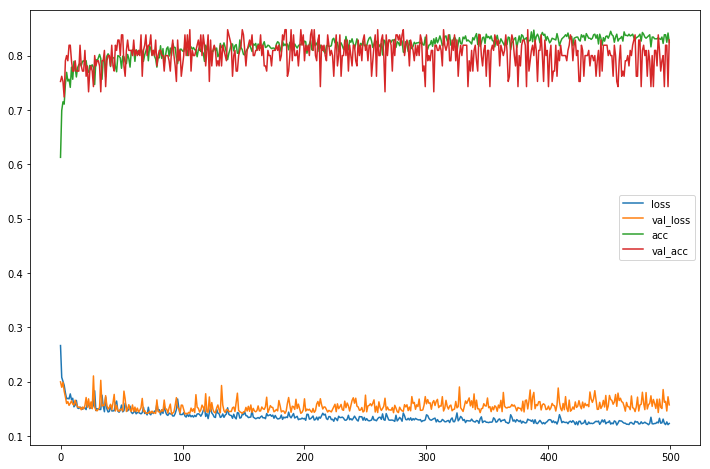

In [38]:
plt.figure(figsize=(12, 8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])
plt.show()

In [39]:
# 디카프리오가 살 수 있었을까?
# 3등실 탑승, 남성, 19살, 형제없고, 부모나 자녀 없음, 싼 표
dicaprio = np.array([3., 0., 19., 0., 0., 5.]).reshape(1,6)
model.predict(dicaprio)

array([[0.15516905]], dtype=float32)

In [40]:
# 윈슬릿은 살수있나?
# 1등실, 여성, 17살, 형제있고, 부모있고, 비싼 표
winslet = np.array([1., 1., 17., 1., 2., 100.]).reshape(1,6)
model.predict(winslet)

array([[0.999846]], dtype=float32)

In [41]:
##### end